<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/Toolbox_projetML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toolbox projet PA numérique AE
Cette boite à outils vous donnes accès à certaines bibliothèques python qui vous seront utiles dans la réalisation de votre projet. 
Elles sont à mettre en perspectives avec les différents cours que vous suivrez au cours de la semaine 
En cas de problème ou de question : jean-marie.vient@univ-brest.

Voila un rappel des éléments attendus (avec un petit planning à titre indicatif):
* J1 : Récupération et traitement de vos données (fusion de matrices, ajout des latitudes longitudes, traietement input Torch) et préparation de votre Présentation des données 
* J2 : Dimensionnement et architecture de votre autoEncoder et application des PCA 
* J3 : PArametrage de votre modèle AE et comparaison avec PCA
* J4 : Finalisation des traitements et préparation de votre présentation

Amusez-vous bien 

## Domaines d'études 
3 ZOIsont proposées,voila leur coordonnées dans la matrice de données spim: 
* [:,1650:1778,970:1098]
* [:,1000:1128,372:500]
* [:,1201:1329,275:403]

Ils sont situés en 3 zones différentes de votre zone d'études entre Mer du nord, Mediterranée et Atlantique
C'est à vous de trouver leurs coordonnées excates avec les autres variables de votre fichier NetCDF

Les fichiers sont stockés dans le NAS : 'Geolab/PA_Numerique/Projet ML'

## NetCDF

In [ ]:
import netCDF4 
import bz2
import numpy as np
import matplotlib.pyplot as plt
with bz2.open("mon_nom_de_fichier.nc.bz2", "rb") as b:#pour décompresser un fichier bz2
    f = netCDF4.Dataset("mon_nom_de_fichier")# Pour ouvir un fichier netcdf 
f.variables #vous affiche l'ensemble des variables contenu dans le netcdf a vous d'detifier celle qui sont importantes pour votre travail

{'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     long_name: reference time of spim field
     standard_name: time
     axis: T
     units: seconds since 1998-01-01 00:00:00
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of -2147483647 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     long_name: latitude
     standard_name: latitude
     axis: Y
     units: degrees_north
 unlimited dimensions: 
 current shape = (2401,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     long_name: longitude
     standard_name: longitude
     axis: X
     units: degrees_east
 unlimited dimensions: 
 current shape = (1667,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'analysed_spim': <class 'netCDF4._netCDF4.Variable'>
 int16 analysed_spim(time, lat, lon)
     long_name: analysed inorganic suspended matters
     standard_name: spim
     

In [ ]:
spim=f.variables['analysed_spim'][:]# Vous avez ici la matrice correspondant à la variable analysed_spim

(1, 2401, 1667)

In [ ]:
print(spim.mask)#on remarque que la donnée est masquée

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]]]


In [ ]:
spimsansmask=spim.data #ajouter .data pour ne récupérer que la variables sans la partie masquée 
print(spimsansmask)

[[[ 4.2999998e-01  3.8999999e-01  3.8999999e-01 ...  3.5999998e-01
    3.4999999e-01  3.5999998e-01]
  [ 3.7000000e-01  3.4000000e-01  3.5999998e-01 ...  3.4999999e-01
    3.4999999e-01  3.5999998e-01]
  [ 3.8000000e-01  3.2999998e-01  3.8999999e-01 ...  3.4999999e-01
    3.4999999e-01  3.5999998e-01]
  ...
  [-3.2768000e+04 -3.2768000e+04 -3.2768000e+04 ... -3.2768000e+04
   -3.2768000e+04 -3.2768000e+04]
  [-3.2768000e+04 -3.2768000e+04 -3.2768000e+04 ... -3.2768000e+04
   -3.2768000e+04 -3.2768000e+04]
  [-3.2768000e+04 -3.2768000e+04 -3.2768000e+04 ... -3.2768000e+04
   -3.2768000e+04 -3.2768000e+04]]]


TypeError: Invalid shape (1, 2401, 1667) for image data

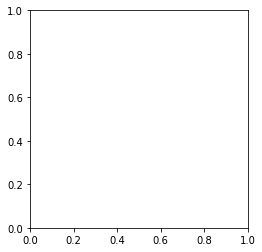

In [ ]:
plt.imshow(spim,origin='lower')# l'image nous donnes un erreur, celle-ci vient de nos dimensions, voir plus haut 

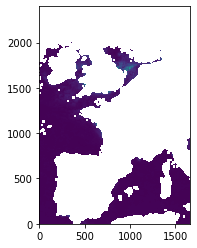

In [ ]:
plt.imshow(spim.reshape(spim.shape[1],spim.shape[2]),origin='lower')

In [ ]:
extrait= f.variables['analysed_spim'][:,732:1517,456:1234]#Si vous souhaitez extraire un bloc spécifique 
extrait.shape

(1, 785, 778)

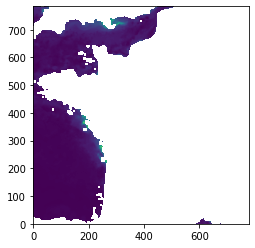

In [ ]:
plt.imshow(extrait.reshape(extrait.shape[1],extrait.shape[2]),origin='lower')

## ACP 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_eof)#(nb modes ou valeur entre 0 et 1) dans le projet, je vous demande 95% de Variance expliquée
Valeurs propres = pca.singular_values_
Vecteurs propres = pca.components_

# AE

In [ ]:
#voila un exemple d'auto encodeur basique fait sous pytorch, il ne s'agit ici que de la 
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=kwargs["input_shape"], out_features=128
        )
        self.encoder_output_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_output_layer = nn.Linear(
            in_features=128, out_features=kwargs["input_shape"]
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed